In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
import numpy as np
import polars as pl
import pandas as pd
from tqdm.auto import tqdm
from pathlib import Path
import sys
sys.path.extend([str(Path.home() / 'PycharmProjects/core_eda')])

from src.core_eda.machine_learning import CrossValidation

In [2]:
df = fetch_openml('parkinsons')
X, y = df.data, df.target

le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


KFold:   0%|          | 0/3 [00:00<?, ?it/s]

KFold:   0%|          | 0/3 [00:00<?, ?it/s]

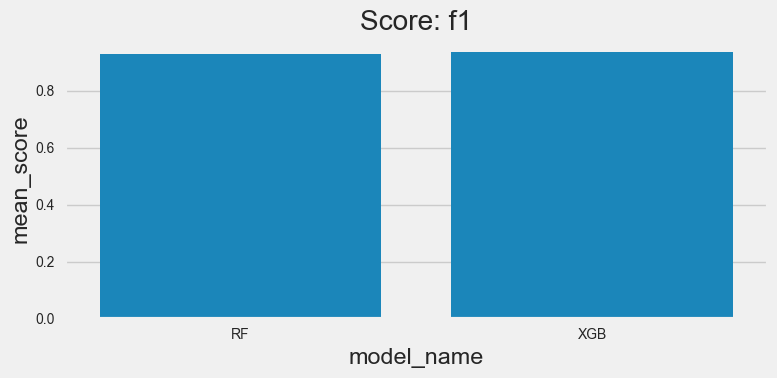

In [3]:
cross = CrossValidation(X, y, fold='kf', metric='f1', n_splits=3)
result = cross.run_model(select_models=['rf', 'xgb'], problem='classification')
cross.plot(result, figsize=(8, 4))

In [5]:
df = fetch_openml(data_id=531, as_frame=True)

X, y = df.data.copy(), df.target
for col in X.select_dtypes(['object', 'category']).columns:
    X[col] = pd.factorize(X[col])[0]

KFold:   0%|          | 0/3 [00:00<?, ?it/s]

KFold:   0%|          | 0/3 [00:00<?, ?it/s]

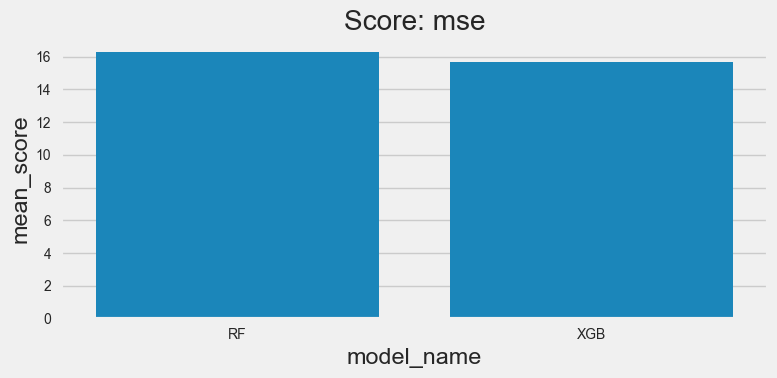

In [6]:
cross = CrossValidation(X, y, fold='kf', metric='mse', n_splits=3)
result = cross.run_model(select_models=['rf', 'xgb'], problem='regression')
cross.plot(result, figsize=(8, 4))

In [7]:
result

{'RF': {'mean_score': 16.30544159178183, 'std_score': 3.634139551776032},
 'XGB': {'mean_score': 15.663158161099242, 'std_score': 0.9925282262217605}}